# Car Sales Analysis

## 1. Cleaning and Understanding the Data

### Reading the dictionaries
### Reading Data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sns
import plotly
import plotly.graph_objs as go
import datetime

In [2]:
#Reading the Data 
data_2009 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2009.csv')
data_2010 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2010.csv')
data_2011 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2011.csv')
data_2012 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2012.csv')
data_2013 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2013.csv')
data_2014 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2014.csv')
data_2015 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2015.csv')
data_2016 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2016.csv')
data_2017 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2017.csv')
data_2018 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2018.csv')
data_2019 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2019.csv')
data_2020 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2020.csv')

In [3]:
#Create de Dataframe
sales_df = pd.concat([data_2009,data_2010,data_2011,data_2012,data_2013,data_2014,data_2015,data_2016,
                     data_2017,data_2018,data_2019,data_2020], ignore_index=True)
sales_df.head()

,PROD_EST,COBERTURA,ANIO,ID_MES,MARCA,MODELO,TIPO,SEGMENTO,ORIGEN,ID_PAIS_ORIGEN,UNI_VEH
0,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,40,29
1,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,66,34
2,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,126,2
3,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,66,35
4,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,40,49


In [4]:
#Export to a new csv
sales_df.to_csv('../Excel/Sales Database.csv', index=False)

In [5]:
# Explore the Dataframe information
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54271 entries, 0 to 54270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PROD_EST        54271 non-null  object
 1   COBERTURA       54271 non-null  object
 2   ANIO            54271 non-null  int64 
 3   ID_MES          54271 non-null  int64 
 4   MARCA           54271 non-null  object
 5   MODELO          54271 non-null  object
 6   TIPO            54271 non-null  object
 7   SEGMENTO        54271 non-null  object
 8   ORIGEN          54271 non-null  object
 9   ID_PAIS_ORIGEN  54271 non-null  int64 
 10  UNI_VEH         54271 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 4.6+ MB
None


In [6]:
# Explore the Types of data
sales_df.dtypes

PROD_EST          object
COBERTURA         object
ANIO               int64
ID_MES             int64
MARCA             object
MODELO            object
TIPO              object
SEGMENTO          object
ORIGEN            object
ID_PAIS_ORIGEN     int64
UNI_VEH            int64
dtype: object

## 2. Preparing the Data
    
### Change the column's names
### Check for missing data
### Change the fields with the matching values in the dictionaries
### Create the final base
    

In [7]:
#Rename Columns to match the names of the data dictionary
sales_df=sales_df.rename(columns={"PROD_EST":"Proyecto","COBERTURA":"Area","ANIO":"Year",
                                 "ID_MES":"Month","MARCA":"Branch","MODELO":"Model","TIPO":"Type",
                                 "SEGMENTO":"Segment","ORIGEN":"Origin","ID_PAIS_ORIGEN":"Country",
                                 "UNI_VEH":"Units"})
sales_df.head()

,Proyecto,Area,Year,Month,Branch,Model,Type,Segment,Origin,Country,Units
0,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,40,29
1,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,66,34
2,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,126,2
3,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,66,35
4,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,40,49


In [8]:
#Read the dictionary missing
country_data = pd.read_csv('../raiavl_venta_mensual_2005_2021/catalogos/tc_pais_origen.csv')
month_data = pd.read_csv('../raiavl_venta_mensual_2005_2021/catalogos/tc_mes.csv')
country_data

,ID_PAIS_ORIGEN,DESC_PAIS_ORIGEN
0,1,México
1,2,Afganistán
2,3,Albania
3,4,Alemania
4,5,Andorra
...,...,...
246,995,No Especificado (Unión Europea)
247,996,No Especificado (Resto de Europa)
248,997,No Especificado (África)
249,998,No Especificado (Oceanía)


In [9]:
sales_df['Year'].astype('category').value_counts()

2020    5538
2019    5514
2009    4887
2010    4628
2018    4617
2011    4379
2017    4188
2016    4146
2014    4143
2015    4133
2013    4116
2012    3982
Name: Year, dtype: int64

In [10]:
#Change the columns name to prepare for the merge
month_data= month_data.rename(columns={"ID_MES":"Month"})
#Create a DataFrame
month_df=pd.DataFrame(month_data)
month_df

,Month,DESCRIPCION_MES
0,1,Enero
1,2,Febrero
2,3,Marzo
3,4,Abril
4,5,Mayo
5,6,Junio
6,7,Julio
7,8,Agosto
8,9,Septiembre
9,10,Octubre


In [11]:
#Create a DataFrame
country_data= pd.DataFrame(country_data)

In [12]:
#Change the columns name to prepare for the merge
country_data= country_data.rename(columns={"ID_PAIS_ORIGEN":"Country"})
country_data

,Country,DESC_PAIS_ORIGEN
0,1,México
1,2,Afganistán
2,3,Albania
3,4,Alemania
4,5,Andorra
...,...,...
246,995,No Especificado (Unión Europea)
247,996,No Especificado (Resto de Europa)
248,997,No Especificado (África)
249,998,No Especificado (Oceanía)


In [13]:
#Merge the dictionary with the Main DataFrame to complete the missing values
sales_final_df=pd.merge(sales_df,country_data, on="Country", how="left")

In [14]:
sales_final_df.head()

,Proyecto,Area,Year,Month,Branch,Model,Type,Segment,Origin,Country,Units,DESC_PAIS_ORIGEN
0,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,40,29,Canadá
1,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,66,34,Estados Unidos
2,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,126,2,Japón
3,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,66,35,Estados Unidos
4,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,40,49,Canadá


In [15]:
#Check that there arent missing values left
sales_final_df.count()

Proyecto            54271
Area                54271
Year                54271
Month               54271
Branch              54271
Model               54271
Type                54271
Segment             54271
Origin              54271
Country             54271
Units               54271
DESC_PAIS_ORIGEN    54271
dtype: int64

In [155]:
Clean_Sales=sales_final_df.drop(['Country','Proyecto'], axis=1)
Clean_Sales

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,DESC_PAIS_ORIGEN
0,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá
1,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos
2,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón
3,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos
4,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá
...,...,...,...,...,...,...,...,...,...,...
54266,Nacional,2020,12,Volkswagen,Volkswagen Caddy,Camiones ligeros,Pick Ups,IMPORTADO,297,Polonia
54267,Nacional,2020,12,Volvo,S60 III,Automóviles,De Lujo,IMPORTADO,38,Estados Unidos
54268,Nacional,2020,12,Volvo,XC40,Automóviles,De Lujo,IMPORTADO,197,Bélgica
54269,Nacional,2020,12,Volvo,XC60 II,Camiones ligeros,SUV's,IMPORTADO,59,Suecia


In [156]:
Clean_Sales= Clean_Sales.rename(columns={"DESC_PAIS_ORIGEN":"Country"})

In [191]:
Clean_Sales.head()

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country
0,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá
1,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos
2,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón
3,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos
4,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá


In [192]:
Final_Clean_Sales=pd.merge(Clean_Sales,month_df, on="Month", how="left")

In [193]:
Final_Clean_Sales.head()

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,DESCRIPCION_MES
0,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá,Enero
1,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos,Enero
2,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón,Enero
3,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos,Enero
4,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá,Enero


In [194]:
Final_Clean_Sales= Final_Clean_Sales.rename(columns={"DESCRIPCION_MES":"Month_Des"})

In [195]:
Final_Clean_Sales.head()

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,Month_Des
0,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá,Enero
1,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos,Enero
2,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón,Enero
3,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos,Enero
4,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá,Enero


# 3. Data Understanding and Exploration
    
### Understanding the fields
    

In [196]:
Final_Clean_Sales.dtypes

Area         object
Year          int64
Month         int64
Branch       object
Model        object
Type         object
Segment      object
Origin       object
Units         int64
Country      object
Month_Des    object
dtype: object

In [197]:
Final_Clean_Sales['Country'].astype('category').value_counts()

Estados Unidos     12517
México              7839
Alemania            7282
Japón               6832
Reino Unido         2814
Canadá              2547
Brasil              2535
España              1737
Corea del Sur       1632
Francia             1369
Tailandia            886
India                859
Italia               856
Bélgica              847
Argentina            553
Hungría              481
Suecia               449
Eslovaquia           429
Colombia             368
Austria              301
China                240
Polonia              179
Indonesia            171
República Checa      158
Turquía              125
Países Bajos         107
Serbia                68
No Especificado       57
Portugal              16
Taiwán                16
Finlandia              1
Name: Country, dtype: int64

In [198]:
Final_Clean_Sales['Country'].count()

54271

In [199]:
Final_Clean_Sales['Type'].astype('category').value_counts()

Automóviles         28763
Camiones ligeros    25508
Name: Type, dtype: int64

In [200]:
Final_Clean_Sales['Branch'].astype('category').value_counts()

General Motors    7276
Ford Motor        4156
Nissan            4152
Chrysler          4059
Volkswagen        3153
Mercedes Benz     2878
Toyota            2592
BMW               2528
Audi              2264
Honda             1850
Peugeot           1660
Renault           1408
Mazda             1377
Volvo             1197
Fiat              1183
Mitsubishi        1075
Subaru             970
Suzuki             934
SEAT               911
Mini               896
Porsche            831
Acura              813
Lincoln            810
Hyundai            792
Land Rover         790
Infiniti           737
KIA                636
Jaguar             550
Alfa Romeo         366
Isuzu              346
Bentley            299
JAC                291
Smart              277
BAIC               214
Name: Branch, dtype: int64

In [201]:
Final_Clean_Sales['Segment'].astype('category').value_counts()

SUV's           14972
De Lujo         12661
Pick Ups         8346
Compactos        6966
Subcompactos     6267
Deportivos       2869
Minivans         2190
Name: Segment, dtype: int64

In [202]:
Final_Clean_Sales['Year'].astype('category').value_counts()

2020    5538
2019    5514
2009    4887
2010    4628
2018    4617
2011    4379
2017    4188
2016    4146
2014    4143
2015    4133
2013    4116
2012    3982
Name: Year, dtype: int64

## Statistical Analysis

In [203]:
df_branch=Final_Clean_Sales.groupby(["Branch"])["Units"].agg(['sum', 'mean','median', 'std'])
df_branch

,sum,mean,median,std
Branch,,,,
Acura,24723,30.409594,22.0,31.002038
Alfa Romeo,1877,5.128415,3.0,5.511374
Audi,134003,59.188604,17.0,91.164796
BAIC,6807,31.808411,17.0,38.370393
BMW,136165,53.862737,19.0,74.355725
Bentley,163,0.545151,0.0,0.746672
Chrysler,869943,214.324464,101.0,295.211255
Fiat,83950,70.963652,23.0,113.931368
Ford Motor,940561,226.314004,106.5,293.163519


In [204]:
df_grouped=Final_Clean_Sales.groupby(["Year"])["Units"].agg(['sum', 'mean','median', 'std','sem'])
df_grouped

,sum,mean,median,std,sem
Year,,,,,
2009,754925,154.476161,31,375.513000,5.371602
2010,820413,177.271608,33,463.634299,6.815204
2011,905893,206.872117,39,532.082216,8.040652
2012,988042,248.127072,54,593.275073,9.401680
2013,1065098,258.770165,54,623.843424,9.723843
2014,1136965,274.430364,59,650.952911,10.113282
2015,1354444,327.714493,73,777.145343,12.088420
2016,1607165,387.642306,94,944.232235,14.664396
2017,1534943,366.509790,84,885.663055,13.685643


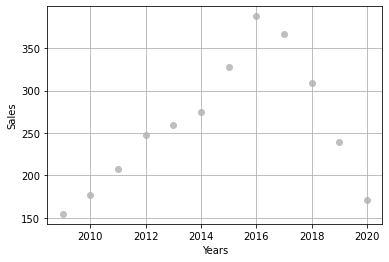

In [205]:
plt.scatter(df_grouped.index, df_grouped['mean'],color='0.75')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


The r-squared is: 0.16911008838802452
y = 8.7x + -17275.19


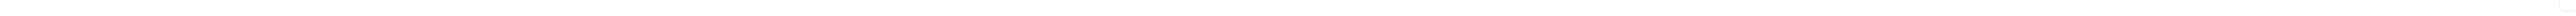

In [206]:
x_values = df_grouped.index
y_values = df_grouped['mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color='0.75')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,5),fontsize=10,color="red")
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

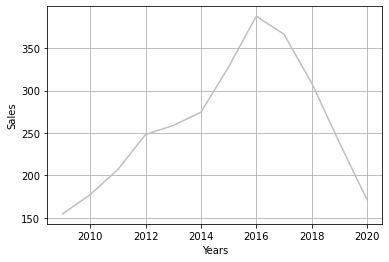

In [207]:
plt.plot(df_grouped.index, df_grouped['mean'], color='0.75')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [208]:
Final_Data=Final_Clean_Sales
Final_Data.head()

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,Month_Des
0,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá,Enero
1,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos,Enero
2,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón,Enero
3,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos,Enero
4,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá,Enero


In [209]:
Final_Data.head()

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,Month_Des
0,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá,Enero
1,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos,Enero
2,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón,Enero
3,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos,Enero
4,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá,Enero


In [210]:
Final_Data['Year']=Final_Data['Year'].astype(str)
Final_Data['Month']=Final_Data['Month'].astype(str)

In [211]:
Final_Data.dtypes

Area         object
Year         object
Month        object
Branch       object
Model        object
Type         object
Segment      object
Origin       object
Units         int64
Country      object
Month_Des    object
dtype: object

In [212]:
Final_Data['Month'] = Final_Data['Month'].str.pad(2, side='left', fillchar='0')

In [214]:
Final_Data

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,Month_Des
0,Nacional,2009,01,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá,Enero
1,Nacional,2009,01,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos,Enero
2,Nacional,2009,01,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón,Enero
3,Nacional,2009,01,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos,Enero
4,Nacional,2009,01,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá,Enero
...,...,...,...,...,...,...,...,...,...,...,...
54266,Nacional,2020,12,Volkswagen,Volkswagen Caddy,Camiones ligeros,Pick Ups,IMPORTADO,297,Polonia,Diciembre
54267,Nacional,2020,12,Volvo,S60 III,Automóviles,De Lujo,IMPORTADO,38,Estados Unidos,Diciembre
54268,Nacional,2020,12,Volvo,XC40,Automóviles,De Lujo,IMPORTADO,197,Bélgica,Diciembre
54269,Nacional,2020,12,Volvo,XC60 II,Camiones ligeros,SUV's,IMPORTADO,59,Suecia,Diciembre


In [215]:
Final_Data['Date'] = Final_Data[['Year', 'Month']].agg(''.join, axis=1)

In [217]:
Final_Data

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,Month_Des,Date
0,Nacional,2009,01,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá,Enero,200901
1,Nacional,2009,01,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos,Enero,200901
2,Nacional,2009,01,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón,Enero,200901
3,Nacional,2009,01,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos,Enero,200901
4,Nacional,2009,01,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá,Enero,200901
...,...,...,...,...,...,...,...,...,...,...,...,...
54266,Nacional,2020,12,Volkswagen,Volkswagen Caddy,Camiones ligeros,Pick Ups,IMPORTADO,297,Polonia,Diciembre,202012
54267,Nacional,2020,12,Volvo,S60 III,Automóviles,De Lujo,IMPORTADO,38,Estados Unidos,Diciembre,202012
54268,Nacional,2020,12,Volvo,XC40,Automóviles,De Lujo,IMPORTADO,197,Bélgica,Diciembre,202012
54269,Nacional,2020,12,Volvo,XC60 II,Camiones ligeros,SUV's,IMPORTADO,59,Suecia,Diciembre,202012


In [220]:
Final_Data['Date'] = pd.to_datetime(Final_Data['Date'], format='%Y%m')

In [241]:
Final_Data.dtypes

Area                 object
Year                 object
Month                object
Branch               object
Model                object
Type                 object
Segment              object
Origin               object
Units                 int64
Country              object
Month_Des            object
Date         datetime64[ns]
dtype: object

In [242]:
Final_Data.head()

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,Month_Des,Date
0,Nacional,2009,01,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,29,Canadá,Enero,2009-01-01
1,Nacional,2009,01,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,34,Estados Unidos,Enero,2009-01-01
2,Nacional,2009,01,Acura,Rl,Automóviles,De Lujo,IMPORTADO,2,Japón,Enero,2009-01-01
3,Nacional,2009,01,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,35,Estados Unidos,Enero,2009-01-01
4,Nacional,2009,01,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,49,Canadá,Enero,2009-01-01


In [233]:
Time_series=Final_Data.groupby(["Date"])["Units"].sum()

In [225]:
time_series_df=pd.DataFrame(Time_series)
time_series_df

,Units
Date,
2009-01-01,69664
2009-02-01,61579
2009-03-01,64242
2009-04-01,51395
2009-05-01,53440
...,...
2020-08-01,77120
2020-09-01,77808
2020-10-01,84331


In [262]:
data = [go.Scatter(x=time_series_df.index, y=time_series_df['Units'])]

plotly.offline.plot(data, filename='Volume vs Time.html')

'Volume vs Time.html'

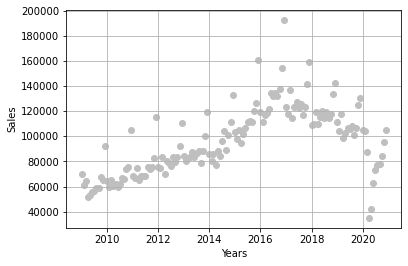

In [259]:
plt.scatter(time_series_df.index, time_series_df['Units'],color='0.75')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [251]:
Data_GM=Final_Data.loc[lambda Final_Data: Final_Data['Branch'] =='General Motors']

In [270]:
Trace_GM=pd.DataFrame(Data_GM.groupby(["Date"])["Units"].sum())
Trace_GM

,Units
Date,
2009-01-01,13083
2009-02-01,11230
2009-03-01,10910
2009-04-01,8672
2009-05-01,10194
...,...
2020-08-01,12115
2020-09-01,10288
2020-10-01,12212


In [246]:
Data_NSANY=Final_Data.loc[lambda Final_Data: Final_Data['Branch'] =='Nissan']

In [268]:
Trace_NSANY=pd.DataFrame(Data_NSANY.groupby(["Date"])["Units"].sum())
Trace_NSANY

,Units
Date,
2009-01-01,13039
2009-02-01,12150
2009-03-01,14032
2009-04-01,8640
2009-05-01,9434
...,...
2020-08-01,16540
2020-09-01,17072
2020-10-01,17953


In [248]:
Data_VLKPY=Final_Data.loc[lambda Final_Data: Final_Data['Branch'] =='Volkswagen']

In [269]:
Trace_VLKPY=pd.DataFrame(Data_VLKPY.groupby(["Date"])["Units"].sum())
Trace_VLKPY

,Units
Date,
2009-01-01,10325
2009-02-01,8599
2009-03-01,9006
2009-04-01,8402
2009-05-01,8060
...,...
2020-08-01,7355
2020-09-01,8255
2020-10-01,9731


In [279]:
trace0 = go.Scatter(
    x = Trace_GM.index,
    y = Trace_GM['Units'],
    mode = 'lines',
    name = 'General Motors'
)

trace1 = go.Scatter(
    x = Trace_NSANY.index,
    y = Trace_NSANY['Units'],
    mode = 'lines',
    name = 'Nissan'
)

trace2 = go.Scatter(
    x = Trace_VLKPY.index,
    y = Trace_VLKPY['Units'],
    mode = 'lines',
    name = 'Volkswagen'
)

data = [trace0, trace1, trace2]
plotly.offline.plot(data, filename='Volume by Branch.html')

'Volume by Branch.html'

In [280]:
Top_Branch = pd.concat([Data_GM,Data_NSANY,Data_VLKPY], ignore_index=True)
Top_Branch.head()

,Area,Year,Month,Branch,Model,Type,Segment,Origin,Units,Country,Month_Des,Date
0,Nacional,2009,01,General Motors,Acadia,Camiones ligeros,SUV's,IMPORTADO,183,Estados Unidos,Enero,2009-01-01
1,Nacional,2009,01,General Motors,Astra 4 Ptas,Automóviles,Compactos,IMPORTADO,60,Brasil,Enero,2009-01-01
2,Nacional,2009,01,General Motors,Astra 5 Ptas,Automóviles,Compactos,IMPORTADO,7,Brasil,Enero,2009-01-01
3,Nacional,2009,01,General Motors,Avalanche UUV,Camiones ligeros,Pick Ups,NACIONAL,79,México,Enero,2009-01-01
4,Nacional,2009,01,General Motors,Aveo,Automóviles,Subcompactos,IMPORTADO,21,China,Enero,2009-01-01


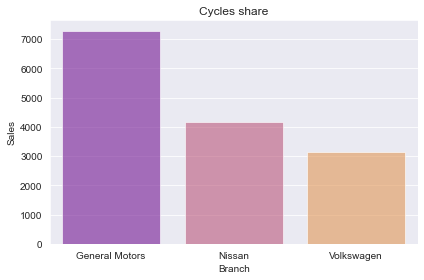

In [281]:
sns.set_style("darkgrid")
g = sns.countplot(data = Top_Branch, x = 'Branch', palette = 'plasma', alpha = 0.6,) 
g.set(xlabel = "Branch", ylabel = 'Sales', title = 'Cycles share') 
#plt.xticks(rotation = 90) 
plt.tight_layout() 
plt.show()